**IMPORTING LIBRARIES**

In [163]:
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

**LOADING DATA**

In [164]:
data= pd.read_csv("crimes.csv")
df=pd.DataFrame(data)
df

,X,Y,CCN,REPORT_DAT,START_DATE,END_DATE,BLOCK,OFFENSE,METHOD,SHIFT,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,BID,XBLOCK,YBLOCK,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
0,405270.5500,134708.8500,25181190,2025/11/30 23:45:02+00,2025/11/30 21:39:00+00,2025/11/30 23:09:00+00,G STREET SE AND ALABAMA AVENUE SE,MOTOR VEHICLE THEFT,OTHERS,EVENING,...,007707 1,7707.0,Precinct 106,NaN,405270.549987,134708.850010,38.880198,-76.939257,878122640,NaN
1,394964.3300,140772.6900,25171459,2025/11/11 03:43:12+00,2025/11/11 03:08:00+00,2025/11/11 03:15:00+00,3319 - 3499 BLOCK OF CONNECTICUT AVENUE NW,THEFT/OTHER,OTHERS,EVENING,...,001304 1,1304.0,Precinct 34,NaN,394964.330000,140772.690000,38.934824,-77.058081,878134664,NaN
2,405684.5761,135633.8979,10133557,2025/06/30 04:00:00+00,2010/09/15 00:45:00+00,2010/09/14 04:00:00+00,4600 - 4699 BLOCK OF A STREET SE,HOMICIDE,GUN,MIDNIGHT,...,009906 1,9906.0,Precinct 104,NaN,405684.576067,135633.897851,38.888528,-76.934478,878137382,NaN
3,394459.1800,141888.0400,25004555,2025/01/11 02:16:23+00,2025/01/11 01:18:00+00,2025/01/11 02:00:00+00,4227 - 4399 BLOCK OF CONNECTICUT AVENUE NW,THEFT/OTHER,OTHERS,EVENING,...,001303 1,1303.0,Precinct 34,NaN,394459.180000,141888.040000,38.944869,-77.063916,878415582,NaN
4,400930.3900,136927.6600,25004681,2025/01/11 09:09:48+00,2025/01/11 03:00:00+00,2025/01/11 08:15:00+00,1200 - 1299 BLOCK OF H STREET NE,THEFT F/AUTO,OTHERS,MIDNIGHT,...,008402 1,8402.0,Precinct 82,NaN,400930.390000,136927.660000,38.900201,-76.989274,878415583,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24144,406451.6900,137312.2500,25065222,2025/05/04 07:47:33+00,2025/05/04 03:36:00+00,2025/05/04 07:24:00+00,5100 - 5199 BLOCK OF SHERIFF ROAD NE,ROBBERY,OTHERS,MIDNIGHT,...,007806 1,7806.0,Precinct 93,NaN,406451.690000,137312.250000,38.903642,-76.925620,878704658,NaN
24145,402121.5900,140166.1800,25067737,2025/05/08 12:44:34+00,2025/05/08 04:00:00+00,2025/05/08 11:30:00+00,2000 - 2099 BLOCK OF RHODE ISLAND AVENUE NE,THEFT F/AUTO,OTHERS,DAY,...,011100 2,11100.0,Precinct 72,NaN,402121.590000,140166.180000,38.929373,-76.975532,878704659,NaN
24146,394895.4000,140924.9000,25127207,2025/08/21 03:42:18+00,2025/08/21 02:00:00+00,2025/08/21 02:30:00+00,3500 - 3599 BLOCK OF CONNECTICUT AVENUE NW,THEFT/OTHER,OTHERS,MIDNIGHT,...,001304 1,1304.0,Precinct 34,NaN,394895.400000,140924.900000,38.936195,-77.058877,878704681,NaN
24147,395579.0800,139867.5500,25140616,2025/09/14 13:07:41+00,2025/09/13 14:30:00+00,2025/09/13 17:30:00+00,2200 - 2274 BLOCK OF CATHEDRAL AVENUE NW,THEFT F/AUTO,OTHERS,DAY,...,000501 1,501.0,Precinct 136,NaN,395579.080000,139867.550000,38.926674,-77.050984,878704682,NaN


**HANDLING NULL VALUES**

In [165]:
df.isnull().sum()

X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
START_DATE                  0
END_DATE                 1694
BLOCK                       0
OFFENSE                     0
METHOD                      0
SHIFT                       0
WARD                        0
ANC                         0
DISTRICT                   32
PSA                        32
NEIGHBORHOOD_CLUSTER        0
BLOCK_GROUP                 6
CENSUS_TRACT                6
VOTING_PRECINCT             0
BID                     19343
XBLOCK                      0
YBLOCK                      0
LATITUDE                    0
LONGITUDE                   0
OBJECTID                    0
OCTO_RECORD_ID          24149
dtype: int64

In [166]:
df.drop(columns=['OCTO_RECORD_ID'],inplace=True) #removed since it has 100% nulls 

In [167]:
df.drop(columns=['BID'],inplace= True) #removed since it contains 80% of the nulls and is irrelevant to the project.

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24149 entries, 0 to 24148
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     24149 non-null  float64
 1   Y                     24149 non-null  float64
 2   CCN                   24149 non-null  int64  
 3   REPORT_DAT            24149 non-null  object 
 4   START_DATE            24149 non-null  object 
 5   END_DATE              22455 non-null  object 
 6   BLOCK                 24149 non-null  object 
 7   OFFENSE               24149 non-null  object 
 8   METHOD                24149 non-null  object 
 9   SHIFT                 24149 non-null  object 
 10  WARD                  24149 non-null  int64  
 11  ANC                   24149 non-null  object 
 12  DISTRICT              24117 non-null  float64
 13  PSA                   24117 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  24149 non-null  object 
 15  BLOCK_GROUP        

In [169]:
df.describe()

,X,Y,CCN,WARD,DISTRICT,PSA,CENSUS_TRACT,XBLOCK,YBLOCK,LATITUDE,LONGITUDE,OBJECTID
count,24149.000000,24149.000000,2.414900e+04,24149.000000,24117.000000,24117.000000,24143.000000,24149.000000,24149.000000,24149.000000,24149.000000,2.414900e+04
mean,399154.913282,137966.548146,2.512722e+07,4.378277,3.648713,369.473069,7589.683842,399154.913283,137966.548146,38.909554,-77.009750,8.785301e+08
std,3025.143331,3473.140299,4.616920e+05,2.280567,1.832285,182.858659,36121.650445,3025.143331,3473.140298,0.031286,0.034881,1.071527e+05
min,390294.800000,127142.290000,5.131706e+06,1.000000,1.000000,101.000000,101.000000,390294.800000,127142.290000,38.812049,-77.111944,8.781226e+08
25%,397204.160000,136464.560000,2.505103e+07,2.000000,2.000000,207.000000,3400.000000,397204.159995,136464.560000,38.896021,-77.032242,8.784328e+08
50%,398818.250000,137862.110000,2.510260e+07,5.000000,3.000000,308.000000,7202.000000,398818.250000,137862.110000,38.908618,-77.013633,8.784675e+08
75%,400978.850000,139967.520000,2.515880e+07,6.000000,5.000000,505.000000,9201.000000,400978.850000,139967.520000,38.927581,-76.988707,8.786512e+08
max,407806.750900,147365.030000,8.927285e+07,8.000000,7.000000,708.000000,980000.000000,407806.750917,147365.030000,38.994217,-76.910012,8.787047e+08


In [170]:
df['PSA'] = df['PSA'].astype(str)
df['DISTRICT'] = df['DISTRICT'].astype(str)
df['PSA'] = df['PSA'].fillna('unknown')
df['DISTRICT'] = df['DISTRICT'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24149 entries, 0 to 24148
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     24149 non-null  float64
 1   Y                     24149 non-null  float64
 2   CCN                   24149 non-null  int64  
 3   REPORT_DAT            24149 non-null  object 
 4   START_DATE            24149 non-null  object 
 5   END_DATE              22455 non-null  object 
 6   BLOCK                 24149 non-null  object 
 7   OFFENSE               24149 non-null  object 
 8   METHOD                24149 non-null  object 
 9   SHIFT                 24149 non-null  object 
 10  WARD                  24149 non-null  int64  
 11  ANC                   24149 non-null  object 
 12  DISTRICT              24149 non-null  object 
 13  PSA                   24149 non-null  object 
 14  NEIGHBORHOOD_CLUSTER  24149 non-null  object 
 15  BLOCK_GROUP        

In [171]:
df.drop(columns=['VOTING_PRECINCT'],inplace=True)

In [172]:
df.drop(columns=['X','Y','XBLOCK','YBLOCK','OBJECTID','BLOCK_GROUP','CENSUS_TRACT','ANC','BLOCK','REPORT_DAT','LATITUDE','LONGITUDE'],inplace=True)
#dropping all the columns irrelevant to the core analysis of this project.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24149 entries, 0 to 24148
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CCN                   24149 non-null  int64 
 1   START_DATE            24149 non-null  object
 2   END_DATE              22455 non-null  object
 3   OFFENSE               24149 non-null  object
 4   METHOD                24149 non-null  object
 5   SHIFT                 24149 non-null  object
 6   WARD                  24149 non-null  int64 
 7   DISTRICT              24149 non-null  object
 8   PSA                   24149 non-null  object
 9   NEIGHBORHOOD_CLUSTER  24149 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.8+ MB


**CHECKING FOR THE DUPLICATES**

In [174]:
int(df['CCN'].duplicated().sum())

3

In [175]:
df[df['CCN'].duplicated(keep=False)][['CCN']].sort_values('CCN')

,CCN
17208,25022969
17207,25022969
14405,25075760
14404,25075760
4493,25076989
4494,25076989


In [176]:
df = df.drop_duplicates()

In [177]:
int(df['CCN'].duplicated().sum())

0

**CORRECTING DATA TYPES**

In [178]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE']   = pd.to_datetime(df['END_DATE'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24146 entries, 0 to 24148
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   CCN                   24146 non-null  int64              
 1   START_DATE            24146 non-null  datetime64[ns, UTC]
 2   END_DATE              22454 non-null  datetime64[ns, UTC]
 3   OFFENSE               24146 non-null  object             
 4   METHOD                24146 non-null  object             
 5   SHIFT                 24146 non-null  object             
 6   WARD                  24146 non-null  int64              
 7   DISTRICT              24146 non-null  object             
 8   PSA                   24146 non-null  object             
 9   NEIGHBORHOOD_CLUSTER  24146 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(2), object(6)
memory usage: 2.0+ MB


C:\Users\intel 2018\AppData\Local\Temp\ipykernel_8916\1592772496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
C:\Users\intel 2018\AppData\Local\Temp\ipykernel_8916\1592772496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DATE']   = pd.to_datetime(df['END_DATE'], errors='coerce')


In [179]:
df['DISTRICT'] = pd.to_numeric(df['DISTRICT'], errors='coerce')
df['PSA'] = pd.to_numeric(df['PSA'], errors='coerce')
df['DISTRICT'] = df['DISTRICT'].astype('Int64')
df['PSA'] = df['PSA'].astype('Int64')

C:\Users\intel 2018\AppData\Local\Temp\ipykernel_8916\393838718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DISTRICT'] = pd.to_numeric(df['DISTRICT'], errors='coerce')
C:\Users\intel 2018\AppData\Local\Temp\ipykernel_8916\393838718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PSA'] = pd.to_numeric(df['PSA'], errors='coerce')
C:\Users\intel 2018\AppData\Local\Temp\ipykernel_8916\393838718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [180]:
df.head(10) # now the data is clean and ready for the analysis.

,CCN,START_DATE,END_DATE,OFFENSE,METHOD,SHIFT,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER
0,25181190,2025-11-30 21:39:00+00:00,2025-11-30 23:09:00+00:00,MOTOR VEHICLE THEFT,OTHERS,EVENING,7,6,605,Cluster 33
1,25171459,2025-11-11 03:08:00+00:00,2025-11-11 03:15:00+00:00,THEFT/OTHER,OTHERS,EVENING,3,2,203,Cluster 15
2,10133557,2010-09-15 00:45:00+00:00,2010-09-14 04:00:00+00:00,HOMICIDE,GUN,MIDNIGHT,7,6,604,Cluster 33
3,25004555,2025-01-11 01:18:00+00:00,2025-01-11 02:00:00+00:00,THEFT/OTHER,OTHERS,EVENING,3,2,203,Cluster 12
4,25004681,2025-01-11 03:00:00+00:00,2025-01-11 08:15:00+00:00,THEFT F/AUTO,OTHERS,MIDNIGHT,6,1,104,Cluster 25
5,25004879,2025-01-08 21:07:00+00:00,2025-01-08 22:30:00+00:00,THEFT/OTHER,OTHERS,EVENING,1,3,303,Cluster 1
6,25005153,2025-01-12 09:28:00+00:00,2025-01-12 09:30:00+00:00,THEFT/OTHER,OTHERS,MIDNIGHT,2,2,208,Cluster 6
7,25005800,2025-01-13 08:30:00+00:00,2025-01-13 17:00:00+00:00,BURGLARY,OTHERS,DAY,2,3,301,Cluster 6
8,25007070,2025-01-15 22:52:00+00:00,2025-01-16 01:59:00+00:00,ROBBERY,GUN,EVENING,7,6,608,Cluster 31
9,25007772,2025-01-17 14:57:00+00:00,2025-01-17 14:59:00+00:00,THEFT F/AUTO,OTHERS,DAY,5,3,308,Cluster 21


**EXPLORATOTY DATA ANALYSIS (EDA)**

*1. IDENTIFYING THE CRIME HOTSPOTS AND THE MOST OCCURING CRIME*

In [181]:
gb= df.groupby('NEIGHBORHOOD_CLUSTER').size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending=False)
top_crime_area=gb.head(5)['NEIGHBORHOOD_CLUSTER']
print(gb.head(5))
print('_'*50)
print("The top five crime area clusters are as follows:\n", top_crime_area)

   NEIGHBORHOOD_CLUSTER  CRIME COUNT
17           Cluster 25         1703
43            Cluster 8         1700
11            Cluster 2         1554
15           Cluster 23         1232
22            Cluster 3         1193
__________________________________________________
The top five crime area clusters are as follows:
 17    Cluster 25
43     Cluster 8
11     Cluster 2
15    Cluster 23
22     Cluster 3
Name: NEIGHBORHOOD_CLUSTER, dtype: object


In [182]:
gb2 = (
    df[df['NEIGHBORHOOD_CLUSTER'].isin(top_crime_area)]
    .groupby(['NEIGHBORHOOD_CLUSTER', 'OFFENSE'])
    .size()
    .reset_index(name='CRIME COUNT')
    .sort_values(['NEIGHBORHOOD_CLUSTER', 'CRIME COUNT'], ascending=[True, False])
)
top_offense= gb2.groupby('NEIGHBORHOOD_CLUSTER').head(3)
print("The top three offenses in each of the clusters having high crime rates are as follows:\n")
print(top_offense)


The top three offenses in each of the clusters having high crime rates are as follows:

   NEIGHBORHOOD_CLUSTER              OFFENSE  CRIME COUNT
7             Cluster 2          THEFT/OTHER          809
6             Cluster 2         THEFT F/AUTO          336
3             Cluster 2  MOTOR VEHICLE THEFT          157
15           Cluster 23          THEFT/OTHER          526
14           Cluster 23         THEFT F/AUTO          331
11           Cluster 23  MOTOR VEHICLE THEFT          212
23           Cluster 25          THEFT/OTHER          816
22           Cluster 25         THEFT F/AUTO          356
19           Cluster 25  MOTOR VEHICLE THEFT          294
31            Cluster 3          THEFT/OTHER          667
30            Cluster 3         THEFT F/AUTO          284
27            Cluster 3  MOTOR VEHICLE THEFT           97
39            Cluster 8          THEFT/OTHER         1198
38            Cluster 8         THEFT F/AUTO          240
35            Cluster 8  MOTOR VEHICLE THE

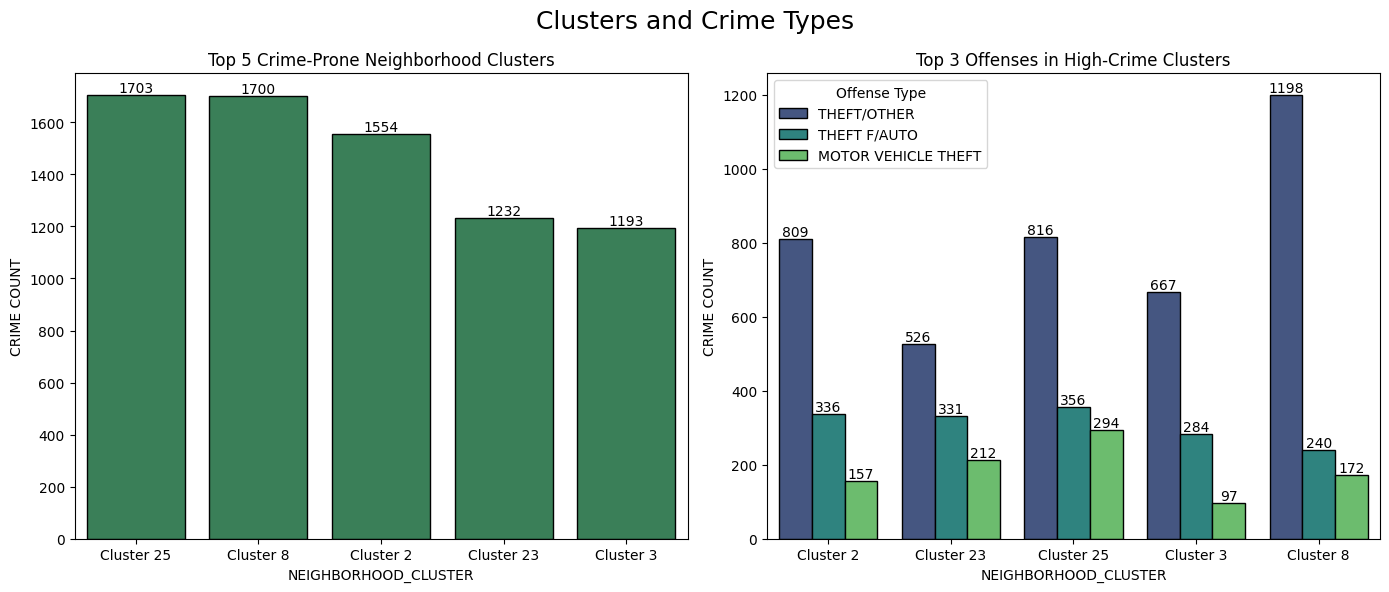

In [183]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
ax=sb.barplot(data=gb.head(5),x='NEIGHBORHOOD_CLUSTER',y='CRIME COUNT',color='seagreen',edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title("Top 5 Crime-Prone Neighborhood Clusters")


plt.subplot(1,2,2)
ax=sb.barplot(data=top_offense,x='NEIGHBORHOOD_CLUSTER',y='CRIME COUNT',hue='OFFENSE',palette='viridis',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Top 3 Offenses in High-Crime Clusters")
plt.legend(title="Offense Type")

plt.suptitle("Clusters and Crime Types", fontsize=18)
plt.tight_layout()
#plt.savefig("H:/DATA_ANALYTICS/Projects/Crimes/charts/cluster_crime.png", dpi=300, bbox_inches="tight")
plt.show()

*2. UNDERSTANDING HOW CRIME VARIES BY TIME OF DAY, DATE AND DURATION TO IDENTIFY HIGH-RISK PERIODS.*


In [184]:
df.head(5)

,CCN,START_DATE,END_DATE,OFFENSE,METHOD,SHIFT,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER
0,25181190,2025-11-30 21:39:00+00:00,2025-11-30 23:09:00+00:00,MOTOR VEHICLE THEFT,OTHERS,EVENING,7,6,605,Cluster 33
1,25171459,2025-11-11 03:08:00+00:00,2025-11-11 03:15:00+00:00,THEFT/OTHER,OTHERS,EVENING,3,2,203,Cluster 15
2,10133557,2010-09-15 00:45:00+00:00,2010-09-14 04:00:00+00:00,HOMICIDE,GUN,MIDNIGHT,7,6,604,Cluster 33
3,25004555,2025-01-11 01:18:00+00:00,2025-01-11 02:00:00+00:00,THEFT/OTHER,OTHERS,EVENING,3,2,203,Cluster 12
4,25004681,2025-01-11 03:00:00+00:00,2025-01-11 08:15:00+00:00,THEFT F/AUTO,OTHERS,MIDNIGHT,6,1,104,Cluster 25


In [185]:
df['CRIME_HOUR']=df['START_DATE'].dt.hour
df['CRIME_DAY']=df['START_DATE'].dt.day_name()
df['CRIME_MONTH']=df['START_DATE'].dt.month
df['DURATION']=(df['END_DATE']-df['START_DATE']).dt.total_seconds()/60
df.head(5)

C:\Users\intel 2018\AppData\Local\Temp\ipykernel_8916\225769381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRIME_HOUR']=df['START_DATE'].dt.hour
C:\Users\intel 2018\AppData\Local\Temp\ipykernel_8916\225769381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRIME_DAY']=df['START_DATE'].dt.day_name()
C:\Users\intel 2018\AppData\Local\Temp\ipykernel_8916\225769381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,CCN,START_DATE,END_DATE,OFFENSE,METHOD,SHIFT,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,CRIME_HOUR,CRIME_DAY,CRIME_MONTH,DURATION
0,25181190,2025-11-30 21:39:00+00:00,2025-11-30 23:09:00+00:00,MOTOR VEHICLE THEFT,OTHERS,EVENING,7,6,605,Cluster 33,21,Sunday,11,90.0
1,25171459,2025-11-11 03:08:00+00:00,2025-11-11 03:15:00+00:00,THEFT/OTHER,OTHERS,EVENING,3,2,203,Cluster 15,3,Tuesday,11,7.0
2,10133557,2010-09-15 00:45:00+00:00,2010-09-14 04:00:00+00:00,HOMICIDE,GUN,MIDNIGHT,7,6,604,Cluster 33,0,Wednesday,9,-1245.0
3,25004555,2025-01-11 01:18:00+00:00,2025-01-11 02:00:00+00:00,THEFT/OTHER,OTHERS,EVENING,3,2,203,Cluster 12,1,Saturday,1,42.0
4,25004681,2025-01-11 03:00:00+00:00,2025-01-11 08:15:00+00:00,THEFT F/AUTO,OTHERS,MIDNIGHT,6,1,104,Cluster 25,3,Saturday,1,315.0


In [186]:
#changing the order of the coulumns in the data set.
df=df[['CCN','START_DATE','END_DATE','CRIME_MONTH','CRIME_DAY','CRIME_HOUR','DURATION','SHIFT','OFFENSE','METHOD','WARD','DISTRICT','PSA','NEIGHBORHOOD_CLUSTER']]
df.head(5)

,CCN,START_DATE,END_DATE,CRIME_MONTH,CRIME_DAY,CRIME_HOUR,DURATION,SHIFT,OFFENSE,METHOD,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER
0,25181190,2025-11-30 21:39:00+00:00,2025-11-30 23:09:00+00:00,11,Sunday,21,90.0,EVENING,MOTOR VEHICLE THEFT,OTHERS,7,6,605,Cluster 33
1,25171459,2025-11-11 03:08:00+00:00,2025-11-11 03:15:00+00:00,11,Tuesday,3,7.0,EVENING,THEFT/OTHER,OTHERS,3,2,203,Cluster 15
2,10133557,2010-09-15 00:45:00+00:00,2010-09-14 04:00:00+00:00,9,Wednesday,0,-1245.0,MIDNIGHT,HOMICIDE,GUN,7,6,604,Cluster 33
3,25004555,2025-01-11 01:18:00+00:00,2025-01-11 02:00:00+00:00,1,Saturday,1,42.0,EVENING,THEFT/OTHER,OTHERS,3,2,203,Cluster 12
4,25004681,2025-01-11 03:00:00+00:00,2025-01-11 08:15:00+00:00,1,Saturday,3,315.0,MIDNIGHT,THEFT F/AUTO,OTHERS,6,1,104,Cluster 25


In [187]:
df['DURATION'].unique()

array([ 9.0000e+01,  7.0000e+00, -1.2450e+03, ...,  1.5460e+03,
        2.4192e+05,  2.2800e+02], shape=(2114,))

In [188]:
#removing the negative durations from the dataset
df=df[df['DURATION']>=0].reset_index(drop=True)
print((df['DURATION']<0).sum())
df.head(5)

0


,CCN,START_DATE,END_DATE,CRIME_MONTH,CRIME_DAY,CRIME_HOUR,DURATION,SHIFT,OFFENSE,METHOD,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER
0,25181190,2025-11-30 21:39:00+00:00,2025-11-30 23:09:00+00:00,11,Sunday,21,90.0,EVENING,MOTOR VEHICLE THEFT,OTHERS,7,6,605,Cluster 33
1,25171459,2025-11-11 03:08:00+00:00,2025-11-11 03:15:00+00:00,11,Tuesday,3,7.0,EVENING,THEFT/OTHER,OTHERS,3,2,203,Cluster 15
2,25004555,2025-01-11 01:18:00+00:00,2025-01-11 02:00:00+00:00,1,Saturday,1,42.0,EVENING,THEFT/OTHER,OTHERS,3,2,203,Cluster 12
3,25004681,2025-01-11 03:00:00+00:00,2025-01-11 08:15:00+00:00,1,Saturday,3,315.0,MIDNIGHT,THEFT F/AUTO,OTHERS,6,1,104,Cluster 25
4,25004879,2025-01-08 21:07:00+00:00,2025-01-08 22:30:00+00:00,1,Wednesday,21,83.0,EVENING,THEFT/OTHER,OTHERS,1,3,303,Cluster 1


In [189]:
#mapping month names
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['CRIME_MONTH'] = df['CRIME_MONTH'].map(month_map)
df.head(5)

,CCN,START_DATE,END_DATE,CRIME_MONTH,CRIME_DAY,CRIME_HOUR,DURATION,SHIFT,OFFENSE,METHOD,WARD,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER
0,25181190,2025-11-30 21:39:00+00:00,2025-11-30 23:09:00+00:00,Nov,Sunday,21,90.0,EVENING,MOTOR VEHICLE THEFT,OTHERS,7,6,605,Cluster 33
1,25171459,2025-11-11 03:08:00+00:00,2025-11-11 03:15:00+00:00,Nov,Tuesday,3,7.0,EVENING,THEFT/OTHER,OTHERS,3,2,203,Cluster 15
2,25004555,2025-01-11 01:18:00+00:00,2025-01-11 02:00:00+00:00,Jan,Saturday,1,42.0,EVENING,THEFT/OTHER,OTHERS,3,2,203,Cluster 12
3,25004681,2025-01-11 03:00:00+00:00,2025-01-11 08:15:00+00:00,Jan,Saturday,3,315.0,MIDNIGHT,THEFT F/AUTO,OTHERS,6,1,104,Cluster 25
4,25004879,2025-01-08 21:07:00+00:00,2025-01-08 22:30:00+00:00,Jan,Wednesday,21,83.0,EVENING,THEFT/OTHER,OTHERS,1,3,303,Cluster 1


In [203]:
#Month-wise crime analysis
gb_m = df.groupby('CRIME_MONTH').size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending=False)
print("Month-wise crime analysis:\n")
print(gb_m.head(5))
print("_"*50)

#Day-wise crime analysis
gb_d = df.groupby('CRIME_DAY').size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending=False)
print("Day-wise crime analysis:\n")
print(gb_d.head(5))
print("_"*50)

#Hourly crime analysis
gb_h = df.groupby('CRIME_HOUR').size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending=False)
print("Hourly crime analysis:\n")
print(gb_h.head(5))
print("_"*50)

#Shift-wise crime analysis
gb_sh = df.groupby('SHIFT').size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending=False)
print("Shift-wise crime analysis:\n")
print(gb_sh)
print("_"*50)

Month-wise crime analysis:

  CRIME_MONTH  CRIME COUNT
5         Jul         2185
8         May         2143
6         Jun         2096
0         Apr         1997
1         Aug         1930
__________________________________________________
Day-wise crime analysis:

   CRIME_DAY  CRIME COUNT
0     Friday         3368
1     Monday         3315
2   Saturday         3247
5    Tuesday         3220
6  Wednesday         3169
__________________________________________________
Hourly crime analysis:

    CRIME_HOUR  CRIME COUNT
19          19         1451
20          20         1399
17          17         1380
18          18         1366
21          21         1366
__________________________________________________
Shift-wise crime analysis:

      SHIFT  CRIME COUNT
1   EVENING         9480
0       DAY         9191
2  MIDNIGHT         3782
__________________________________________________


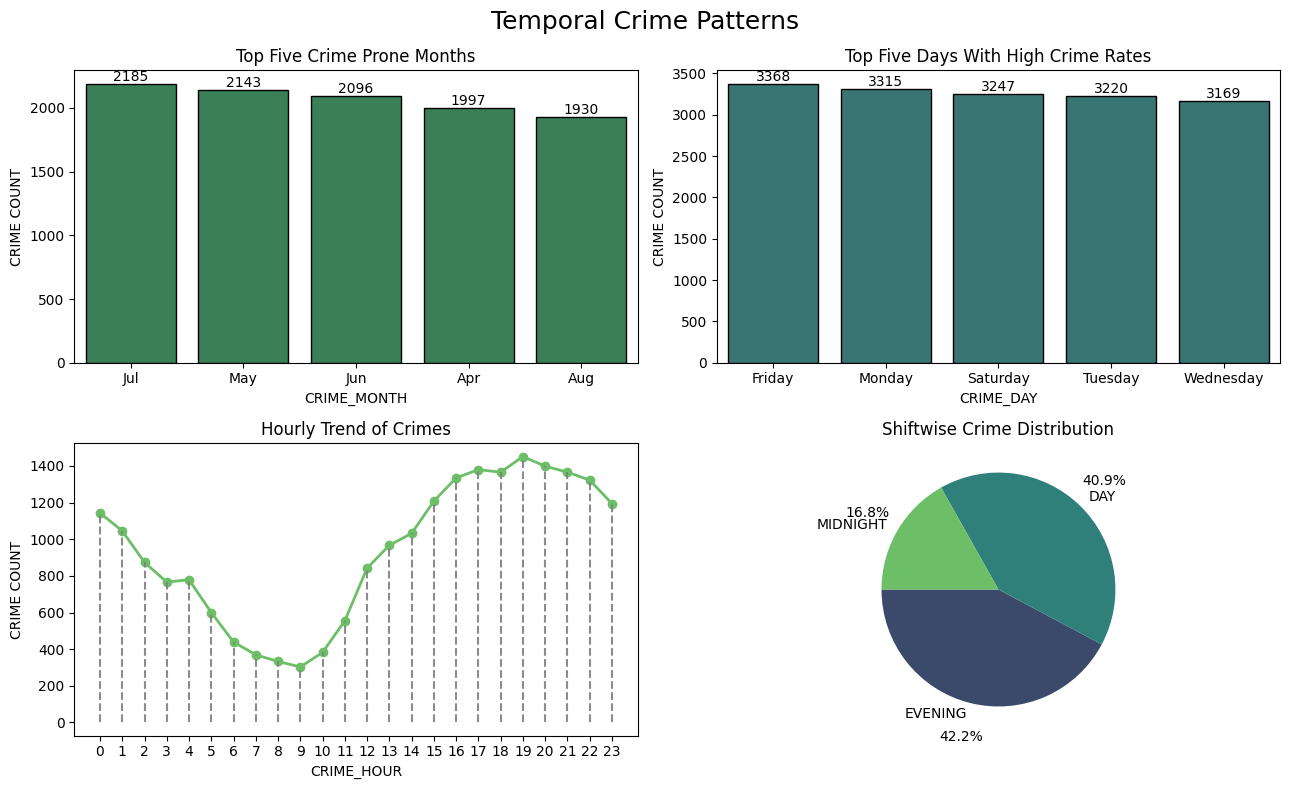

In [217]:
plt.figure(figsize=(13,8))

# Top five Crime prone Months
plt.subplot(2,2,1)
ax=sb.barplot(data=gb_m.head(5),x='CRIME_MONTH',y='CRIME COUNT',color= 'seagreen',edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title("Top Five Crime Prone Months")

# Top five days with high crime rates
plt.subplot(2,2,2)
ax=sb.barplot(data=gb_d.head(5),x='CRIME_DAY',y='CRIME COUNT',edgecolor='black',color='#2f7f7b')
ax.bar_label(ax.containers[0])
plt.title("Top Five Days With High Crime Rates")

# Hourly crime distribution 
plt.subplot(2,2,3)
gb_h = gb_h.sort_values('CRIME_HOUR')
plt.plot(gb_h['CRIME_HOUR'],gb_h['CRIME COUNT'],color='#6dbf67',marker='o',linewidth=2)
plt.vlines(x=gb_h['CRIME_HOUR'],ymin=0,ymax=gb_h['CRIME COUNT'],colors='gray',alpha=0.9,linestyles='dashed')
plt.xlabel('CRIME_HOUR')
plt.ylabel('CRIME COUNT')
plt.title("Hourly Trend of Crimes")
plt.xticks(range(0, 24))

# Shiftwise Crimes
plt.subplot(2,2,4)
plt.pie(gb_sh['CRIME COUNT'],labels=gb_sh['SHIFT'],autopct='%1.1f%%',pctdistance=1.3,startangle=180,colors=['#3b4a6b','#2f7f7b','#6dbf67'])
plt.title("Shiftwise Crime Distribution")

plt.suptitle("Temporal Crime Patterns",fontsize=18)
plt.tight_layout()
#plt.savefig("H:/DATA_ANALYTICS/Projects/Crimes/charts/temporal.png", dpi=300, bbox_inches="tight")
plt.show()

In [192]:
# checking the relationship between the shift and the offense.

# NULL HYPOTHESIS : There is no association between the shift and the offense type of the crime.
# ALTERNATIVE HYPOTHESIS : There is an association between the shift and the offense type of the crime.

contingency = pd.crosstab(df['SHIFT'], df['OFFENSE'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("This is the p-value : ",p,"\n")
if (p>=0.05):
    print("We fail to reject the null hypothesis as p-value is : ",p)
else:
     print("We will reject the null hypothesis as p-value is : ",p)

print("\nConclusion: The chi-square test indicates a statistically significant association between crime shift and offense type (p < 0.05).")
print("_"*50)

# Finding the top three offenses per Shift.
gb_o = df.groupby(['SHIFT','OFFENSE']).size().reset_index(name='CRIME COUNT').sort_values(by=['SHIFT','CRIME COUNT'],ascending=[True,False])
print("\nTop three offenses per shift are:\n")
top_offense=gb_o.groupby('SHIFT').head(3)
print(top_offense)

This is the p-value :  0.0 

We will reject the null hypothesis as p-value is :  0.0

Conclusion: The chi-square test indicates a statistically significant association between crime shift and offense type (p < 0.05).
__________________________________________________

Top three offenses per shift are:

       SHIFT              OFFENSE  CRIME COUNT
6        DAY          THEFT/OTHER         4553
5        DAY         THEFT F/AUTO         2398
2        DAY  MOTOR VEHICLE THEFT         1553
14   EVENING          THEFT/OTHER         5072
13   EVENING         THEFT F/AUTO         1949
10   EVENING  MOTOR VEHICLE THEFT         1333
23  MIDNIGHT          THEFT/OTHER         1289
22  MIDNIGHT         THEFT F/AUTO          803
19  MIDNIGHT  MOTOR VEHICLE THEFT          704


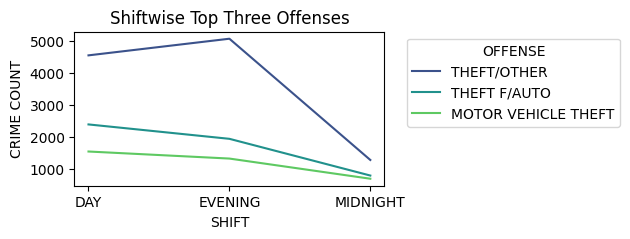

In [193]:
plt.figure(figsize=(4,2))
sb.lineplot(data=top_offense, x='SHIFT',y='CRIME COUNT',hue='OFFENSE',palette='viridis',markers= True)
plt.title("Shiftwise Top Three Offenses")
plt.legend(title="OFFENSE",bbox_to_anchor=(1.05, 1),loc='upper left')
#plt.savefig("H:/DATA_ANALYTICS/Projects/Crimes/charts/shift-offense.png", dpi=300, bbox_inches="tight")
plt.show()

Crime incidents are highest during the Evening shift, with THEFT/OTHER emerging as the most dominant offense type in this period.

*3. UNDERSTANDING CRIME TYPES AND METHODS.*

In [194]:
# finding top 5 offenses and methods by which the were conducted.
gb_m= df.groupby(['OFFENSE','METHOD']).size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending = False)
print('Top five Offenses and their methods: \n',gb_m.head(5))

Top five Offenses and their methods: 
                 OFFENSE  METHOD  CRIME COUNT
23          THEFT/OTHER  OTHERS        10831
20         THEFT F/AUTO  OTHERS         5125
11  MOTOR VEHICLE THEFT  OTHERS         3572
6              BURGLARY  OTHERS          637
14              ROBBERY  OTHERS          620


In [195]:
gb_m.head(10)

,OFFENSE,METHOD,CRIME COUNT
23,THEFT/OTHER,OTHERS,10831
20,THEFT F/AUTO,OTHERS,5125
11,MOTOR VEHICLE THEFT,OTHERS,3572
6,BURGLARY,OTHERS,637
14,ROBBERY,OTHERS,620
12,ROBBERY,GUN,487
1,ASSAULT W/DANGEROUS WEAPON,GUN,413
2,ASSAULT W/DANGEROUS WEAPON,KNIFE,223
3,ASSAULT W/DANGEROUS WEAPON,OTHERS,145
7,HOMICIDE,GUN,84


For all top offenses, the method is predominantly recorded as “OTHERS”, indicating limited granularity in method classification rather than diverse crime execution patterns.

*4. COMPAIRING ADMINISTRATIVE REGIONS.*

In [196]:
# District-wise crime analysis

gb_dis=df.groupby('DISTRICT').size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending = False)
print('Top three Districts with highest number of crimes : \n',gb_dis.head(3))
print('_'*50)

# PSA level crime analysis

gb_p=df.groupby('PSA').size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending = False)
print('Top three PSA with highest number of crimes : \n',gb_p.head(3))
print('_'*50)

# Ward-wise crime analysis

gb_w=df.groupby('WARD').size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending = False)
print('Top three wards with highest number of crimes : \n',gb_w.head(3))
print('_'*50)

# Cluster-wise crime analysis

gb_c=df.groupby('NEIGHBORHOOD_CLUSTER').size().reset_index(name='CRIME COUNT').sort_values(by='CRIME COUNT',ascending = False)
print('Top three Clusters with highest number of crimes : \n',gb_c.head(3))

Top three Districts with highest number of crimes : 
    DISTRICT  CRIME COUNT
1         2         4386
2         3         3978
4         5         3676
__________________________________________________
Top three PSA with highest number of crimes : 
     PSA  CRIME COUNT
14  207          844
34  501          812
21  305          802
__________________________________________________
Top three wards with highest number of crimes : 
    WARD  CRIME COUNT
1     2         4004
4     5         3756
5     6         3018
__________________________________________________
Top three Clusters with highest number of crimes : 
    NEIGHBORHOOD_CLUSTER  CRIME COUNT
43            Cluster 8         1609
17           Cluster 25         1601
11            Cluster 2         1441


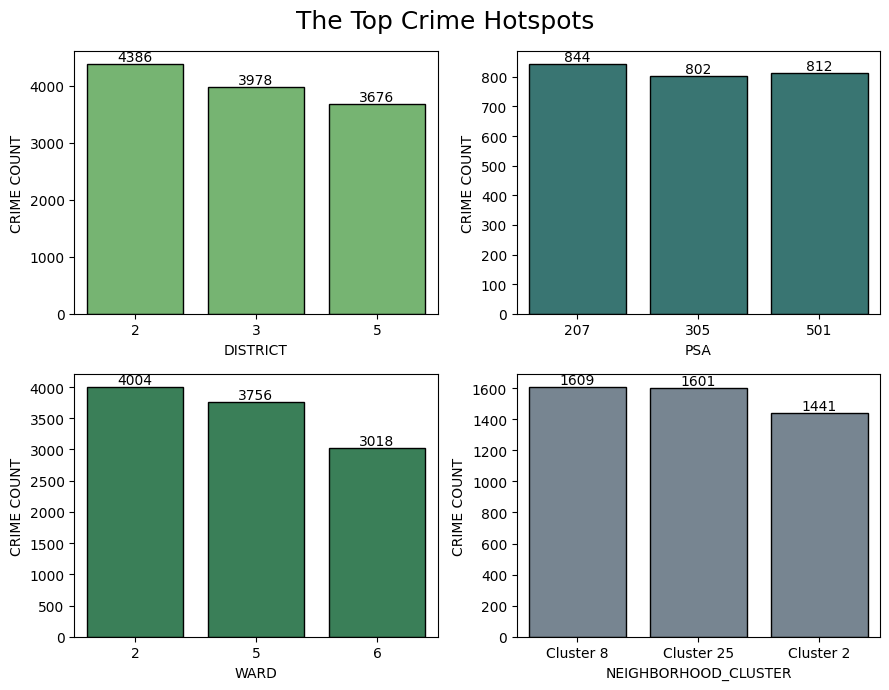

In [197]:
plt.figure(figsize=(9,7))

# Top three districts
plt.subplot(2,2,1)
ax=sb.barplot(data=gb_dis.head(3),x='DISTRICT',y='CRIME COUNT',color='#6dbf67',edgecolor='black')
ax.bar_label(ax.containers[0])

# Top three PSA
plt.subplot(2,2,2)
ax=sb.barplot(data=gb_p.head(3),x='PSA',y='CRIME COUNT',color='#2f7f7b',edgecolor='black')
ax.bar_label(ax.containers[0])

# Top three wards
plt.subplot(2,2,3)
ax=sb.barplot(data=gb_w.head(3),x='WARD',y='CRIME COUNT',color='seagreen',edgecolor='black')
ax.bar_label(ax.containers[0])

# Top three clusters
plt.subplot(2,2,4)
ax=sb.barplot(data=gb_c.head(3),x='NEIGHBORHOOD_CLUSTER',y='CRIME COUNT',color='#738595',edgecolor='black')
ax.bar_label(ax.containers[0])

plt.suptitle("The Top Crime Hotspots",fontsize=18)
plt.tight_layout()
#plt.savefig("H:/DATA_ANALYTICS/Projects/Crimes/charts/crime_hotspots.png", dpi=300, bbox_inches="tight")
plt.show()

Crime is not evenly distributed across regions. A few districts, wards, PSAs, and neighborhood clusters account for a higher share of incidents, indicating localized crime hotspots. This suggests the need for area-specific enforcement and resource allocation rather than uniform policing.

**Findings from temporal, offense-based, and spatial analyses are synthesized to derive strategic recommendations for patrol planning and resource allocation. Detailed policy implications are discussed in the final report.**

In [198]:
#Saving the clean dataset.
#df.to_csv("clean_data.csv")